# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Not for Grading

## Learning Objectives

At the end of the experiment, you will be able to

*   plot frequency graphs
*   perform normal distribution

### Setup Steps

In [12]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [13]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [14]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U1W4_13_Probability" #name of the notebook
Answer = "Ungraded"
def setup():
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/ipl.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


In [52]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

matches = pd.read_csv('ipl.csv')
matches.shape


(756, 18)

In [53]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [56]:
matches.win_by_wickets

0       0
1       7
2      10
3       6
4       0
       ..
751     9
752     6
753     2
754     6
755     0
Name: win_by_wickets, Length: 756, dtype: int64

### Cumulative relative frequency graph

Let's take `win_by_wickets` dataset and plot a frequency distribution graph.

X-axis - Win by wickets (value from 1 to 10), Y-axis - Number of instances (or frequency) of win-by-wicket margin

1       7
2      10
3       6
5       9
6       4
       ..
750     6
751     9
752     6
753     2
754     6
Name: win_by_wickets, Length: 406, dtype: int64


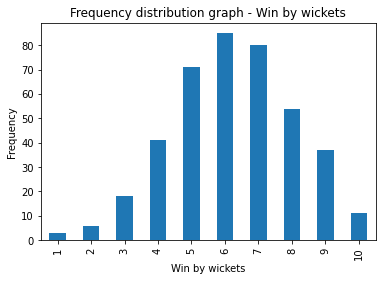

In [60]:
win_by_wickets_data = matches[matches.win_by_wickets > 0].win_by_wickets
print(win_by_wickets_data)
win_by_wickets_freq = win_by_wickets_data.value_counts(sort=False)
#print(win_by_wickets_freq)
win_by_wickets_freq.plot.bar()
plt.title("Frequency distribution graph - Win by wickets")
plt.xlabel("Win by wickets")
plt.ylabel("Frequency")
plt.show()

In [62]:
#matches['win_by_wickets'].value_counts()

Now, let's plot the **Relative frequency distribution graph** for the same data. Here in **Y-axis**, instead of showing the frequency, we show the **percentage** of the value. We can use the `normalize = True` argument for `pandas.Series.value_counts` method

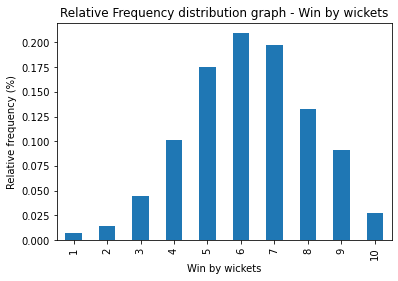

In [59]:
win_by_wickets_data = matches[matches.win_by_wickets > 0].win_by_wickets
win_by_wickets_rel_freq = win_by_wickets_data.value_counts(sort = False, normalize = True)
win_by_wickets_rel_freq.plot.bar()
plt.title("Relative Frequency distribution graph - Win by wickets")
plt.xlabel("Win by wickets")
plt.ylabel("Relative frequency (%)")
plt.show()

From here, we can plot the **cumulative relative frequency graph** using `pandas.Series.cumsum` .

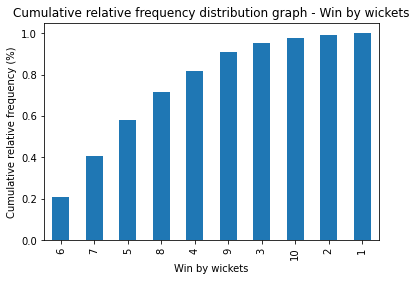

In [63]:
win_by_wickets_cumulative_freq = win_by_wickets_data.value_counts(sort = True, normalize = True).cumsum()
win_by_wickets_cumulative_freq.plot.bar()
plt.title("Cumulative relative frequency distribution graph - Win by wickets")
plt.xlabel("Win by wickets")
plt.ylabel("Cumulative relative frequency (%)")
plt.show()

### Normal distribution

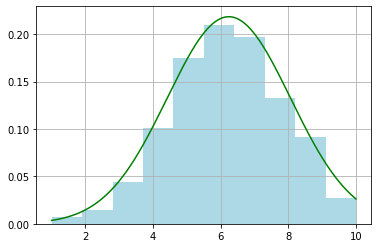

In [50]:
# Get mean (mu) and std (sigma)
win_by_wickets_mean = win_by_wickets_data.mean()
win_by_wickets_std = win_by_wickets_data.std()

# Plot histogram (normalized) - LIGHT-BLUE
win_by_wickets_data.hist(color='lightblue', weights = np.zeros_like(win_by_wickets_data) + 1.0 / win_by_wickets_data.count())

# Normal distribution for random points between 1 to 10 with mean, std.
random_data = np.arange(1, 10,.001)
plt.plot(random_data, stats.norm.pdf(random_data, win_by_wickets_mean, win_by_wickets_std), color='green')
plt.show()

In [64]:
win_by_wickets_data.count()

406

In [65]:
np.zeros_like(win_by_wickets_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [67]:
np.zeros_like(win_by_wickets_data) + 1.0 / win_by_wickets_data.count()

array([0.00246305, 0.00246305, 0.00246305, 0.00246305, 0.00246305,
       0.00246305, 0.00246305, 0.00246305, 0.00246305, 0.00246305,
       0.00246305, 0.00246305, 0.00246305, 0.00246305, 0.00246305,
       0.00246305, 0.00246305, 0.00246305, 0.00246305, 0.00246305,
       0.00246305, 0.00246305, 0.00246305, 0.00246305, 0.00246305,
       0.00246305, 0.00246305, 0.00246305, 0.00246305, 0.00246305,
       0.00246305, 0.00246305, 0.00246305, 0.00246305, 0.00246305,
       0.00246305, 0.00246305, 0.00246305, 0.00246305, 0.00246305,
       0.00246305, 0.00246305, 0.00246305, 0.00246305, 0.00246305,
       0.00246305, 0.00246305, 0.00246305, 0.00246305, 0.00246305,
       0.00246305, 0.00246305, 0.00246305, 0.00246305, 0.00246305,
       0.00246305, 0.00246305, 0.00246305, 0.00246305, 0.00246305,
       0.00246305, 0.00246305, 0.00246305, 0.00246305, 0.00246305,
       0.00246305, 0.00246305, 0.00246305, 0.00246305, 0.00246305,
       0.00246305, 0.00246305, 0.00246305, 0.00246305, 0.00246

### Probability of winning the game who won the toss is?

In [57]:
len(matches[matches['toss_winner'] == matches['winner']])/len(matches)

0.5198412698412699

## Please answer the questions below to complete the experiment:

In [27]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Too Simple, I am wasting time" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [28]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NaN" #@param {type:"string"}


In [29]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [30]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [31]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 4266
Date of submission:  19 Sep 2020
Time of submission:  14:45:15
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
